In [ ]:
import pandas as pd
from io import StringIO

data = """user_id,timestamp,amount,category,merchant
1,2024-04-01 10:12:23,1200,Food,Zomato
1,2024-04-03 09:01:10,2500,Shopping,Amazon
1,2024-04-05 20:45:00,150,Transport,Ola
1,2024-04-07 08:30:11,800,Utilities,BESCOM
1,2024-04-10 19:25:33,3000,Entertainment,BookMyShow
1,2024-04-12 11:45:56,4500,Shopping,Flipkart
1,2024-04-15 15:50:14,750,Food,Swiggy
1,2024-04-16 22:10:45,100,Transport,Uber
1,2024-04-18 13:00:20,500,Utilities,Airtel
1,2024-04-20 17:30:22,2000,Health,1mg
1,2024-04-22 09:55:44,1800,Shopping,Myntra
1,2024-04-25 10:10:10,2200,Entertainment,Netflix
1,2024-04-28 18:40:35,900,Food,McDonalds
1,2024-04-29 21:15:07,600,Transport,Rapido
1,2024-04-30 14:25:00,1200,Food,KFC
1,2024-05-01 08:55:12,2500,Shopping,Amazon
1,2024-05-03 10:30:30,150,Transport,Ola
1,2024-05-05 12:10:45,800,Utilities,BESCOM
1,2024-05-07 20:40:20,4000,Entertainment,PVR
1,2024-05-10 16:05:33,5000,Shopping,Flipkart
1,2024-05-12 14:20:00,850,Food,Swiggy
1,2024-05-14 07:45:10,150,Transport,Uber
1,2024-05-16 15:00:00,550,Utilities,Jio
1,2024-05-18 19:30:22,1700,Health,PharmEasy
1,2024-05-20 21:10:44,2400,Shopping,Myntra
1,2024-05-23 09:20:10,2300,Entertainment,Netflix
1,2024-05-25 13:15:00,950,Food,KFC
1,2024-05-27 10:05:33,500,Transport,Rapido
1,2024-05-30 17:10:20,1100,Food,Zomato
"""

df = pd.read_csv(StringIO(data), parse_dates=["timestamp"])
df.to_csv("transactions.csv", index=False)


In [ ]:
import pandas as pd

df = pd.read_csv("transactions.csv", parse_dates=["timestamp"])


In [ ]:
# Fill missing categories
df['category'].fillna('Others', inplace=True)

# Add month for analysis
df['month'] = df['timestamp'].dt.to_period('M')

# Remove outliers for amount
df = df[df['amount'] < df['amount'].quantile(0.99)]


<ipython-input-3-328ae7a62d01>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['category'].fillna('Others', inplace=True)


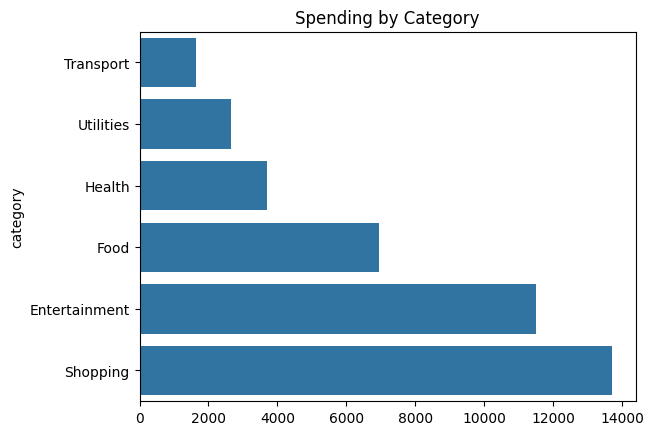

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

category_spending = df.groupby('category')['amount'].sum().sort_values()
sns.barplot(x=category_spending.values, y=category_spending.index)
plt.title("Spending by Category")
plt.show()


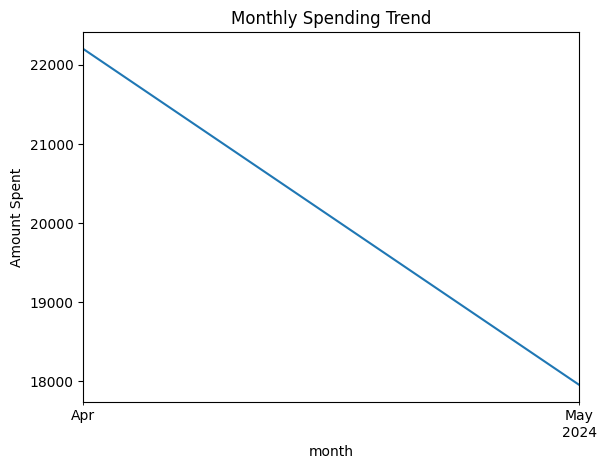

In [ ]:
monthly = df.groupby('month')['amount'].sum()
monthly.plot(kind='line', title="Monthly Spending Trend")
plt.ylabel("Amount Spent")
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Prepare data
monthly_df = df.groupby('month')['amount'].sum().reset_index()
monthly_df['month_index'] = range(len(monthly_df))

# Model
X = monthly_df[['month_index']]
y = monthly_df['amount']

model = LinearRegression()
model.fit(X, y)

# Predict next month
next_month = [[len(monthly_df)]]
predicted = model.predict(next_month)[0]
print(f"Predicted Spending Next Month: ₹{predicted:.2f}")


Predicted Spending Next Month: ₹13700.00


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
budget_limit = 10000
if predicted > budget_limit:
    print("⚠️ You may exceed your budget next month. Consider reducing expenses.")
else:
    print("✅ You are on track with your budget!")


⚠️ You may exceed your budget next month. Consider reducing expenses.


In [ ]:
monthly_df.to_csv("monthly_spending_report.csv", index=False)
